## 프로젝트1
- 데이터 가져오기
- 모델에 입력할 데이터 X 준비하기
- 모델에 예측할 데이터 y 준비하기
- train/test 데이터 분리하기
- 모델 준비하기
- 손실함수 loss 정의하기
- 기울기 구하는 gradient 함수 구현하기
- 하이퍼 파라미터인 학습률 설정하기
- 모델 학습하기
- test 데이터에 대한 성능 확인하기
- 정답 데이터와 예측한 데이터 시각화하기

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print("슝=3")

슝=3


- sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
- diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

In [428]:
# 데이터 가져오기
diabetes = load_diabetes()

# 아래처럼 데이터를 불러오면 ndarray 형태이지만, 
# 다음 단계에서 Numpy array 형태로 변환하는 작업을 해주어야 하므로 
# 데이터 프레임으로 불러온다..
# df_X = diabetes.data
# df_y = diabetes.target

data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
target = pd.Series(data=diabetes.target, name='target')
data['target'] = target
print(data.shape)
data.head()

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


데이터를 편하게 관찰하기 위해 데이터프레임 형태로 불러왔다.

In [429]:
# 컬럼 선택 전(target 제외 모든 컬럼 사용)
df_X = data[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]

# 컬럼 선택 후
# df_X = data[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]

# target 데이터
df_y = data['target']

# 형태 파악하기
print(df_X.shape)
print(df_y.shape)
df_X.head()

(442, 10)
(442,)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [430]:
df_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

- df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
- df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [431]:
# 데이터프레임과 시리즈를 NumPy 배열로 변환
df_X = df_X.to_numpy()
df_y = df_y.to_numpy()

- X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [432]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


- 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
- 모델 함수를 구현해주세요.

In [433]:
W = np.random.rand(10)
b = np.random.rand()

In [434]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

- 손실함수를 MSE 함수로 정의해주세요.

In [435]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

- 기울기를 계산하는 gradient 함수를 구현해주세요.

In [436]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

- 학습률, learning rate 를 설정해주세요
- 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [437]:
LEARNING_RATE = 0.1

- 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
- loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
- 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [439]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6256.8752
Iteration 20 : Loss 5912.1790
Iteration 30 : Loss 5835.4613
Iteration 40 : Loss 5764.0879
Iteration 50 : Loss 5694.9546
Iteration 60 : Loss 5627.9515
Iteration 70 : Loss 5563.0063
Iteration 80 : Loss 5500.0492
Iteration 90 : Loss 5439.0131
Iteration 100 : Loss 5379.8330
Iteration 110 : Loss 5322.4464
Iteration 120 : Loss 5266.7930
Iteration 130 : Loss 5212.8142
Iteration 140 : Loss 5160.4541
Iteration 150 : Loss 5109.6581
Iteration 160 : Loss 5060.3738
Iteration 170 : Loss 5012.5508
Iteration 180 : Loss 4966.1401
Iteration 190 : Loss 4921.0946
Iteration 200 : Loss 4877.3688
Iteration 210 : Loss 4834.9189
Iteration 220 : Loss 4793.7023
Iteration 230 : Loss 4753.6783
Iteration 240 : Loss 4714.8072
Iteration 250 : Loss 4677.0511
Iteration 260 : Loss 4640.3729
Iteration 270 : Loss 4604.7373
Iteration 280 : Loss 4570.1100
Iteration 290 : Loss 4536.4578
Iteration 300 : Loss 4503.7487
Iteration 310 : Loss 4471.9519
Iteration 320 : Loss 4441.0376
Iteration 330 : L

Iteration 2810 : Loss 2993.2859
Iteration 2820 : Loss 2992.4686
Iteration 2830 : Loss 2991.6590
Iteration 2840 : Loss 2990.8569
Iteration 2850 : Loss 2990.0623
Iteration 2860 : Loss 2989.2751
Iteration 2870 : Loss 2988.4952
Iteration 2880 : Loss 2987.7225
Iteration 2890 : Loss 2986.9569
Iteration 2900 : Loss 2986.1985
Iteration 2910 : Loss 2985.4471
Iteration 2920 : Loss 2984.7027
Iteration 2930 : Loss 2983.9651
Iteration 2940 : Loss 2983.2344
Iteration 2950 : Loss 2982.5104
Iteration 2960 : Loss 2981.7930
Iteration 2970 : Loss 2981.0823
Iteration 2980 : Loss 2980.3782
Iteration 2990 : Loss 2979.6805
Iteration 3000 : Loss 2978.9892


> - 원래 코드: 컬럼 전부 유지하고 학습률 유지  
> Iteration 1000 : Loss 21729.8917

> - try1: 컬럼 전부 유지하고 학습률 0.01로 조절  
> Iteration 1000 : Loss 5377.7815

> - try2: 컬럼 전부 유지하고 학습률 0.1로 조절  
> Iteration 1000 : Loss 3442.5775

> - try3: age, sex 컬럼 제외하고 학습률 0.01로 조절  
> Iteration 1000 : Loss 5393.9372

> - try4: age, sex 컬럼 제외하고 학습률 0.0001로 조절  
> Iteration 1000 : Loss 21770.3462

> - try5: 컬럼 전부 유지하고 학습률 0.1로 조절, 반복횟수 3000번으로 조절  
> Iteration 3000 : Loss 2978.9892

손실함수 값이 터무니 없이 크지만 우선 컬럼은 유지하고, 학습률을 0.1로 조절하고 반복횟수를 늘린 결과가 가장 나아보인다.

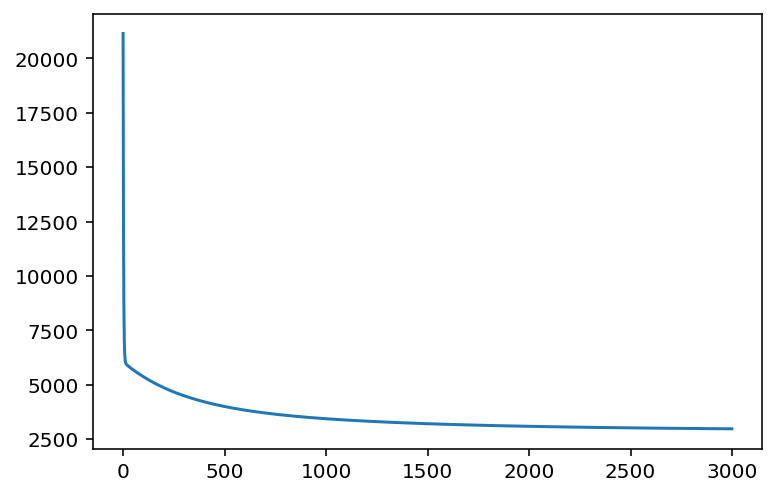

In [440]:
plt.plot(losses)
plt.show()

In [441]:
W, b

(array([  49.78248721, -151.15676321,  446.96393121,  295.90434758,
         -39.43309488,  -85.59306222, -204.78938434,  146.94979557,
         337.23588047,  138.66453737]),
 151.54750974013615)

- test 데이터에 대한 성능을 확인해주세요.

In [442]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2870.1706428025213

- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

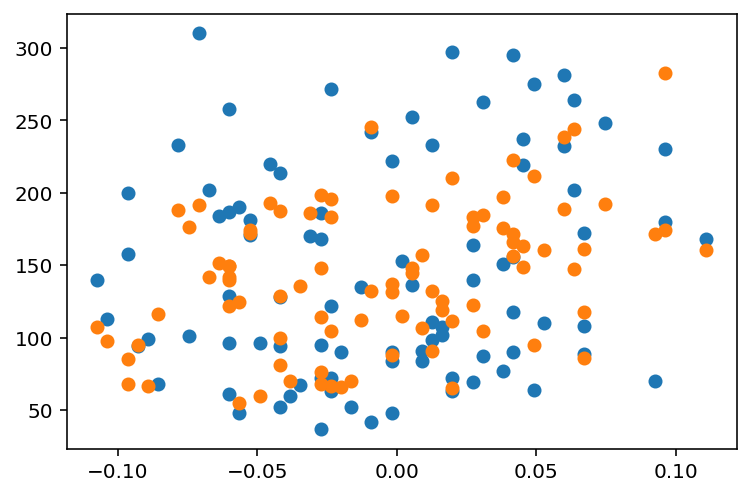

In [443]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 프로젝트2
- 데이터 가져오기
- 자료형 변환 및 파생 변수 생성하기
- 데이터 개수 시각화하기
- X, y 컬럼 선택 및 train/test 데이터 분리하기
- LinearRegression 모델 학습하기
- X_test에 대한 예측값 출력 및 손실함수 값 계산하기
- 예측 결과 시각화하기

- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.

In [398]:
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.shape)

train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


- datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼을 생성합니다.

In [399]:
# datetime 컬럼을 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])

# 연, 월, 일, 시, 분, 초 컬럼 추가
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0


In [400]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

- year, month, day, hour, minute, second 데이터 개수를 sns.countplot을 활용해서 시각화해봅니다.
- subplot을 활용해서 한 번에 6개의 그래프를 함께 시각화합니다.

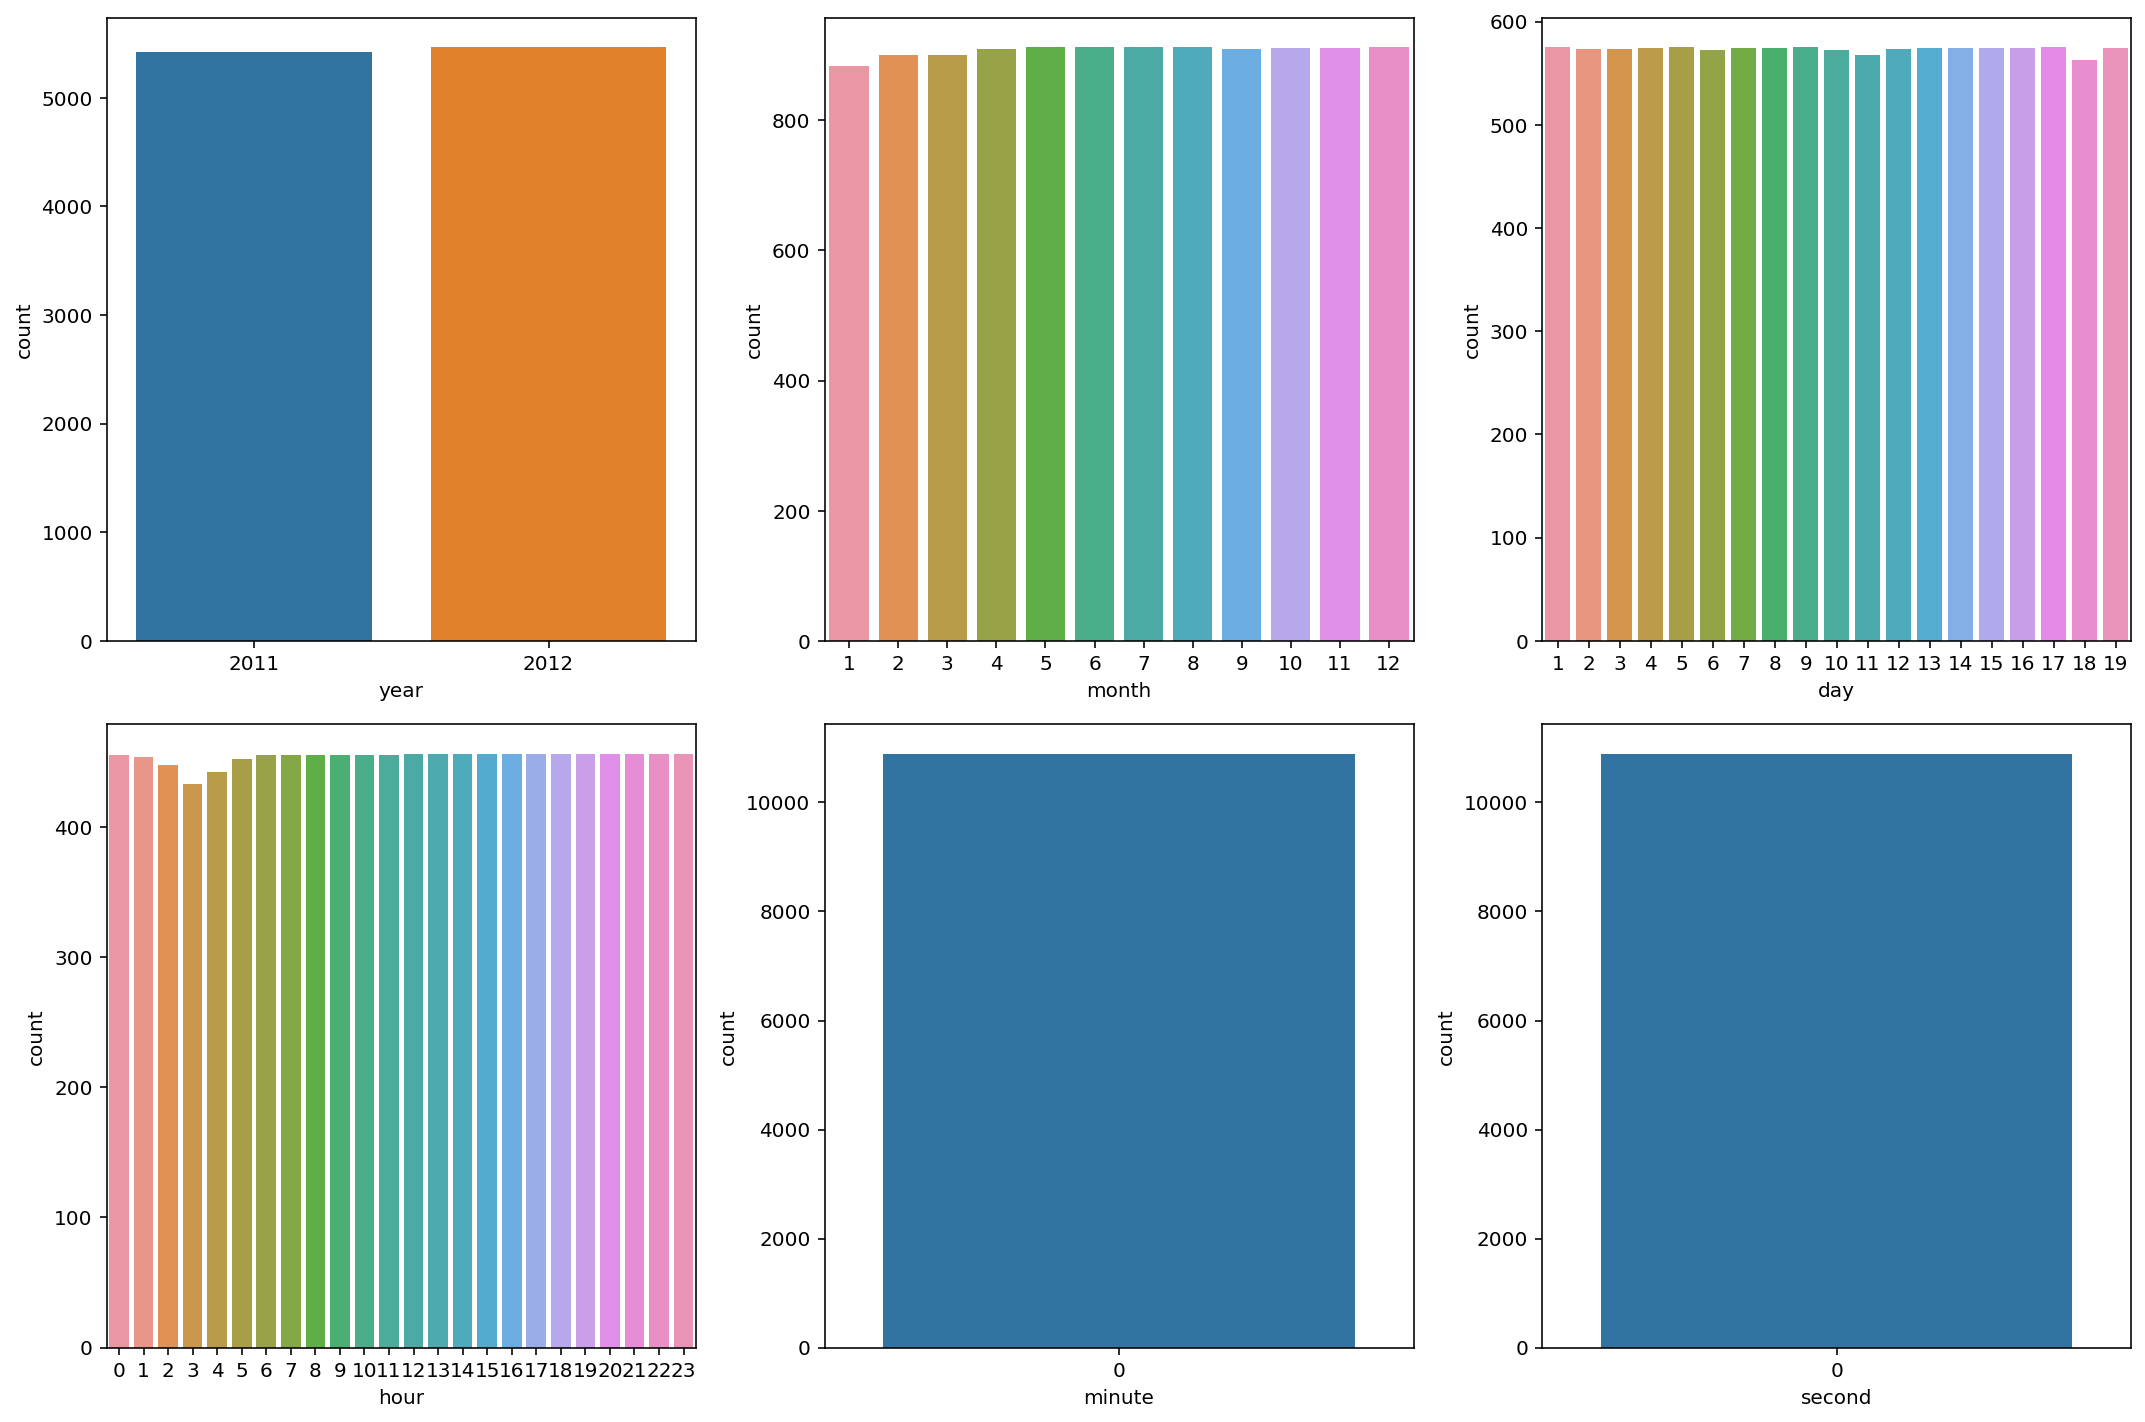

In [401]:
# 빈 도화지 생성
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 각 컬럼별 countplot 그래프 생성
sns.countplot(data=train, x='year', ax=axes[0, 0])
sns.countplot(data=train, x='month', ax=axes[0, 1])
sns.countplot(data=train, x='day', ax=axes[0, 2])
sns.countplot(data=train, x='hour', ax=axes[1, 0])
sns.countplot(data=train, x='minute', ax=axes[1, 1])
sns.countplot(data=train, x='second', ax=axes[1, 2])

# 서브플롯 간 간격 조정
plt.tight_layout()

plt.show()

In [402]:
train['minute'].value_counts()

0    10886
Name: minute, dtype: int64

In [403]:
train['second'].value_counts()

0    10886
Name: second, dtype: int64

시각화 결과, minute, second 컬럼 그래프가 막대 하나로 나온 것을 보고 value_counts()를 사용하여 데이터를 확인했다.  
그 결과, 값이 0으로 밖에 존재하지 않음을 확인했다. countplot으로는 결과를 확인하기 어려우니 barplot을 활용해보겠다.

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount per sec')]

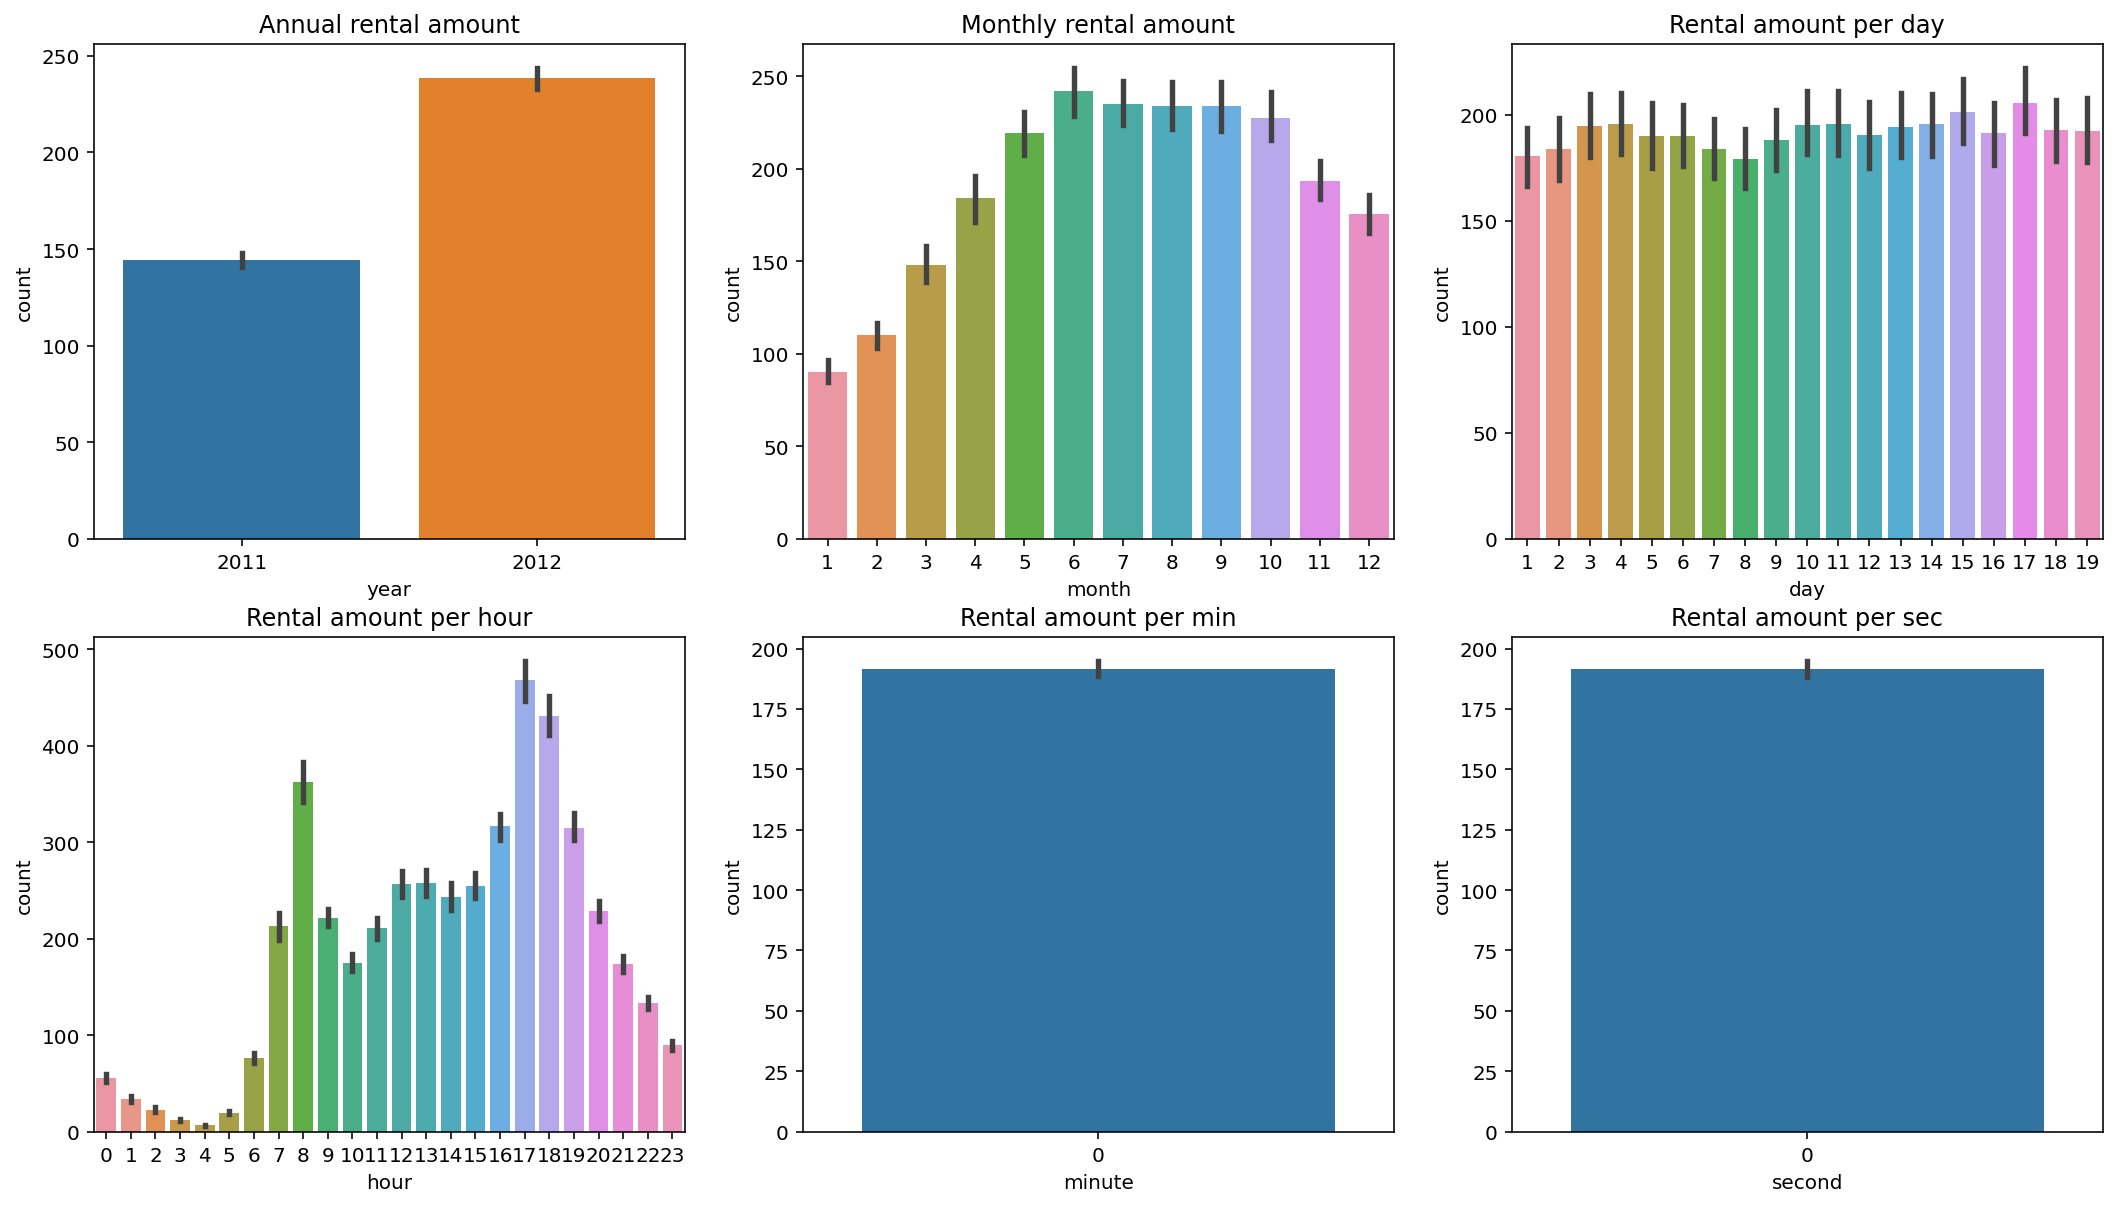

In [405]:
#여러개 차트를 동시에 그려줌
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3) # 3x2 형태의 그래프
figure.set_size_inches(18,10)

sns.barplot(data=train, x = train["year"], y = "count", ax = ax1)
sns.barplot(data=train, x = train["month"], y = "count", ax = ax2)
sns.barplot(data=train, x = train["day"], y = "count", ax = ax3)
sns.barplot(data=train, x = train["hour"], y = "count", ax = ax4)
sns.barplot(data=train, x = train["minute"], y = "count", ax = ax5)
sns.barplot(data=train, x = train["second"], y = "count", ax = ax6)

ax1.set(ylabel = "count", title = "Annual rental amount")
ax2.set(ylabel = "count", title = "Monthly rental amount")
ax3.set(ylabel = "count", title = "Rental amount per day")
ax4.set(ylabel = "count", title = "Rental amount per hour")
ax5.set(ylabel = "count", title = "Rental amount per min")
ax6.set(ylabel = "count", title = "Rental amount per sec")

2012년에 대여량이 증가한다.  
날씨가 따뜻해지면서 대여량이 증가한다.(봄부터 증가헤서 여름에 최대, 가을까지 유지 후 겨울에 최저 대여)  
아침 8시, 오후 5~6시에 대여량이 높다.  
__-> 출퇴근 시간에 대여량이 증가하는 것으로 보임__

In [407]:
#요일을 추가해서 평일과 주말의 대여량 비교
train["dayofweek"] = train["datetime"].dt.dayofweek
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [409]:
#2011년 대비 2012년에 대여량 증가, 기간 데이터를 더 자세히 보기 위해 연도와 월을 합친 컬럼 추가
def year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["yyyy_mm"] = train["datetime"].apply(year_month)

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,yyyy_mm
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5,2011-1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5,2011-1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5,2011-1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5,2011-1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5,2011-1


<AxesSubplot:xlabel='yyyy_mm', ylabel='count'>

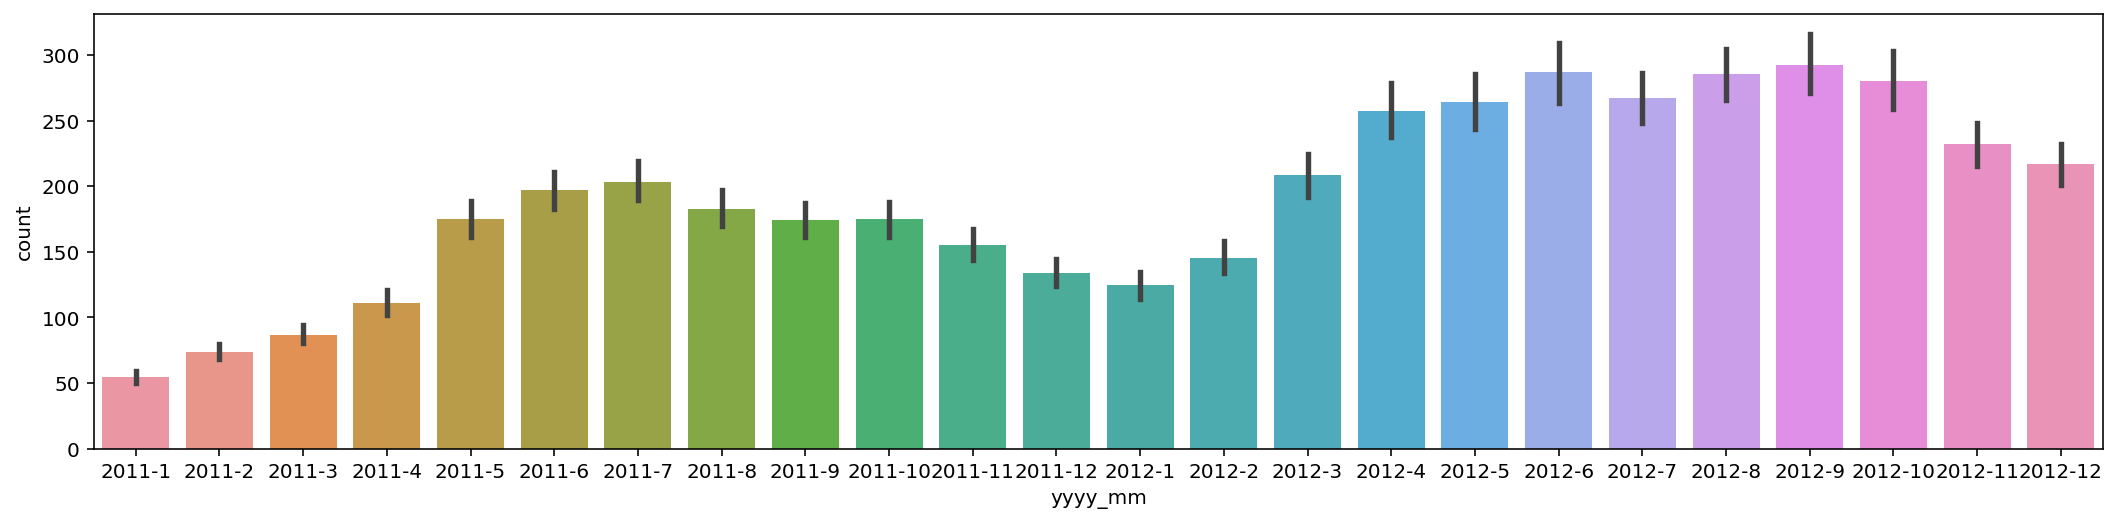

In [425]:
plt.figure(figsize=(18, 4))
sns.barplot(data=train, x = train["yyyy_mm"], y = "count")

2011, 2012년 모두 특정 달에 사용자가 많아진다.

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터를 넣어주세요.

In [419]:
# 시각화 결과 및 설명을 토대로 X 데이터 선정
X = train.drop(['datetime', 'minute', 'second', 'yyyy_mm', 'casual', 'count'], axis=1)
y = train['count']

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 14) (8708,)
(2178, 14) (2178,)


- sklearn의 LinearRegression 모델을 불러오고 학습해주세요.

In [421]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- 학습된 모델에 X_test를 입력해서 예측값을 출력해주세요.
- 모델이 예측한 값과 정답 target 간의 손실함수 값을 계산해주세요.
- mse 값과 함께 rmse 값도 계산해주세요.

In [422]:
predictions = model.predict(X_test)
predictions

array([146.93941254,  15.18526351, 199.47631406, ..., 453.86916273,
        18.53944194, 245.10468586])

In [423]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5        # MSE의 제곱근
    return rmse

mse = mean_squared_error(y_test, predictions)
rmse = RMSE(predictions, y_test)

print(f'mse: {mse}, rmse: {rmse}')

mse: 1165.7058706672576, rmse: 34.14243504302611


> - casual, registered 컬럼을 모두 제외하면 오차값이 너무 크고 모두 유지하면 오차값이 너무 작다. 

> - registered 컬럼을 제외하면,  
> mse: 12440.871274171657, rmse: 111.5386537222485  

> - casual 컬럼을 제외하면,  
> mse: 1165.7058706672576, rmse: 34.14243504302611

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화해보세요.
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화해보세요.

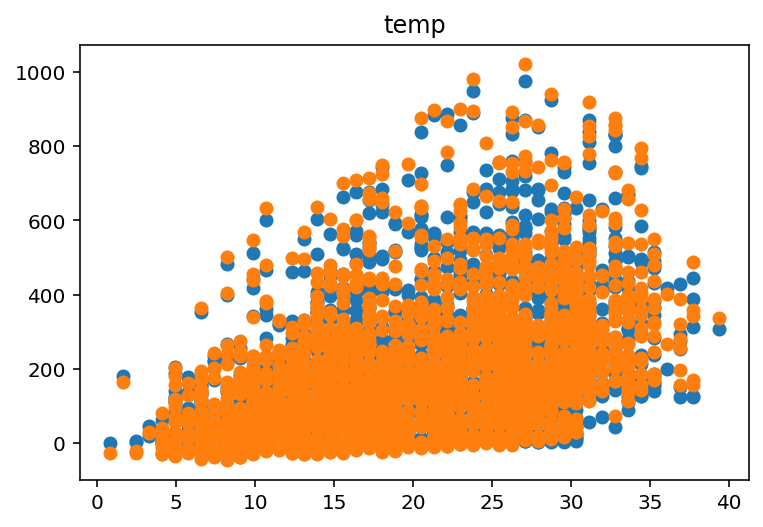

In [426]:
plt.scatter(X_test['temp'], y_test)
plt.scatter(X_test['temp'], predictions)
plt.title('temp')
plt.show()

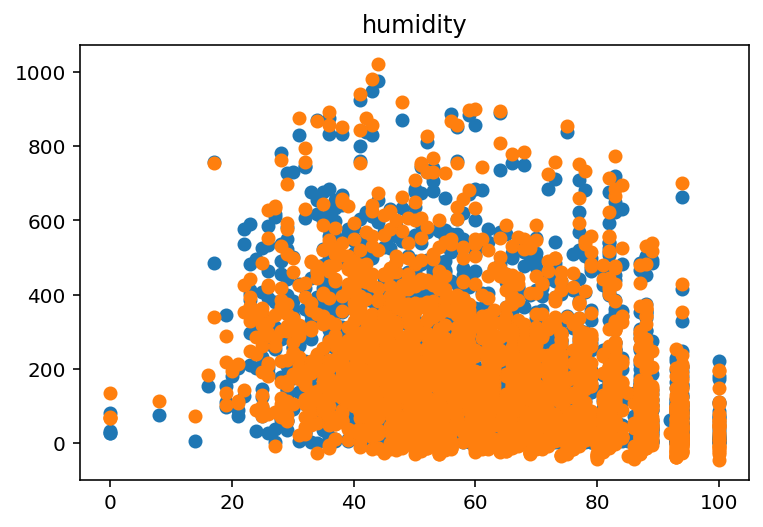

In [427]:
plt.scatter(X_test['humidity'], y_test)
plt.scatter(X_test['humidity'], predictions)
plt.title('humidity')
plt.show()

# 회고

### 어려웠던 점
> - 데이터를 예측하기까지 모델 준비부터 성능 평가까지 많은 개념이 필요했다. 특히, 그 중간에 포함된 개념을 이해하기 위해 수학적인 접근도 해야했고, 완전히 이해하는 것이 힘들었다. 
> - 모델을 학습시킬 때마다 손실함수 값의 변화를 출력하는 부분에서 터무니 없이 높은 손실함수 값을 어떻게 줄여야 할지 난감했다. 
> - countplot을 통해 데이터를 좀 더 편하게 보고 싶었는데 결과가 생각보다 유의미해보여서 당황했다. 이 문제는 네비게이터분께서 barplot을 사용하면 결과가 좀 더 직관적으로 보인다고 알려줘서 해결할 수 있었다.

### 학습한 내용
> - 보통 모델링을 하면 RandomForest, LinearRegression 등 다양한 모델이 떠오른다. 이번 노드에서 LinearRegression을 배우기 전에 model을 선언하는 방법부터 배웠다. 이를 통해 모델이 학습하는 원리를 클래식한 방법으로 배울 수 있었다. 
> - 손실함수 값을 줄이는 방법은 다양하다. 학습률을 조정할 수도 있고, 학습 데이터를 조정할 수도 있다. 이 두 가지의 방법으로 설정을 미세하게 조정함에 따라 손실함수 값이 크게 변화하는 것을 확인할 수 있었다. 그래서 모델 학습을 여러 번 시도해봄으로써 가장 적당한 설정을 찾는 것도 중요하고, 그 전에 전처리 과정을 꼼꼼히 살펴봐야할 필요성을 느꼈다.
> - 예측한 데이터로 시각화를 하면 예측이 얼마나 잘 되었는지 확인하기 수월하다는 점을 터득했다. 수치만으로 확인하는 것은 애매한데, 시각화 결과를 참고하니까 해석하는 것이 훨씬 편했다.

# 참고

- https://www.kaggle.com/c/bike-sharing-demand/data

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html